In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def f(x):
    return np.exp(-(x**2)) * (2 + np.sin(5 * x) + np.sin(2 * x))

In [31]:
xx = np.linspace(-3, 3, 100)
yy_ = f(xx)

yy = yy_ / yy_.sum()

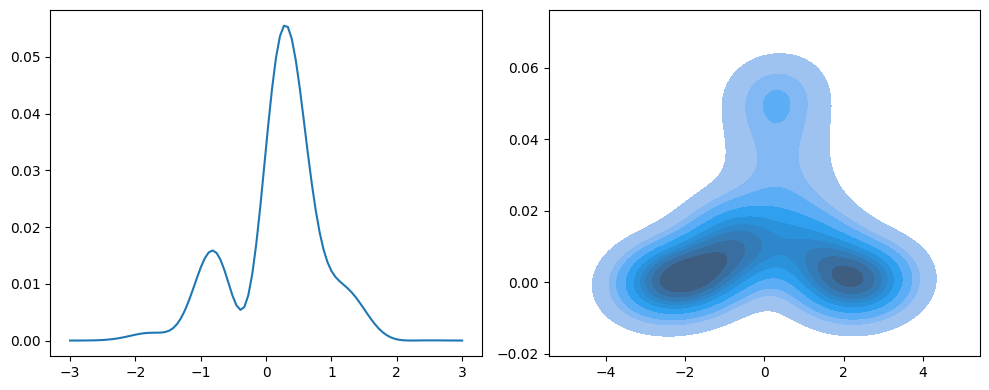

In [8]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(xx, yy)
sns.kdeplot(x=xx, y=yy, fill=True, ax=ax2)

plt.tight_layout()
plt.show()

In [9]:
def compute_metropolis_step(current_x: float, sigma: float) -> float:
    proposed_x = current_x + sigma * np.random.randn()
    acceptance_prob = min(1, f(proposed_x) / f(current_x))
    u = np.random.uniform(0, 1)

    if u <= acceptance_prob:
        return proposed_x

    else:
        return current_x

In [10]:
def sample_from_distribution(
    initial_value: float,
    samples: int = 1000,
    sigma: float = 1.0,
    burnin: int = 500,
) -> list[float]:
    sampled_values = []

    current_x = initial_value

    for i in range(burnin + samples):
        current_x = compute_metropolis_step(current_x=current_x, sigma=sigma)

        if i >= burnin:
            sampled_values.append(current_x)

    return sampled_values

In [19]:
zz = sample_from_distribution(initial_value=0.0, samples=1_000)

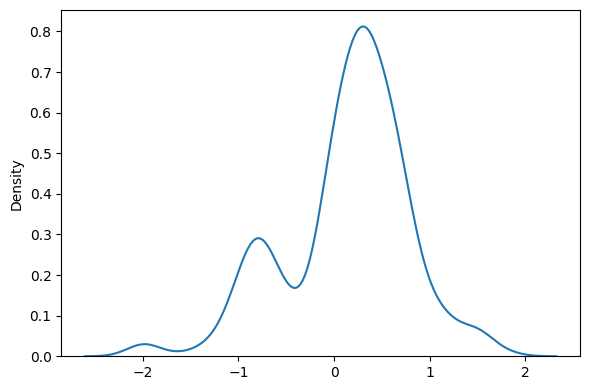

In [24]:
plt.subplots(figsize=(6, 4))

sns.kdeplot(x=zz, fill=False)

plt.tight_layout()
plt.show()

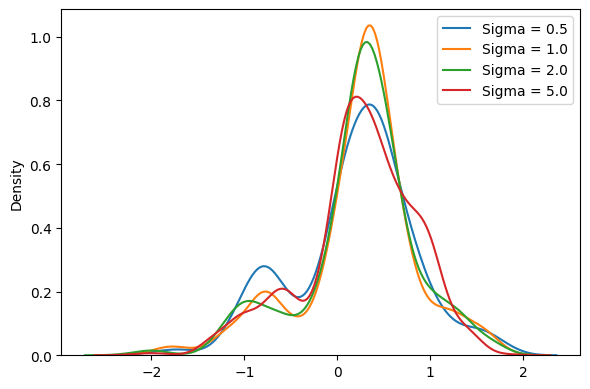

In [40]:
plt.subplots(figsize=(6, 4))

for s in [0.5, 1.0, 2.0, 5.0]:
    zz = sample_from_distribution(initial_value=0.0, samples=1_000, sigma=s)
    sns.kdeplot(x=zz, label=f"Sigma = {s}")

plt.legend()
plt.tight_layout()
plt.show()